# Ingeniería de Características: Transformaciones de Variables (Core) / Elida Peña
**Descripción:**

En esta actividad, aplicarás diversas técnicas de transformación de variables para mejorar la calidad de los datos en el dataset «House Prices – Advanced Regression Techniques» disponible en Kaggle. Aprenderás a realizar transformaciones logarítmicas, escalado y creación de variables polinómicas para mejorar el rendimiento de los modelos predictivos.

Enlace al dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques



****Objetivo:**

El objetivo es realizar transformaciones de las variables en el dataset para mejorar la distribución de los datos y su relación con la variable objetivo (el precio de las casas). Estas transformaciones son clave para mejorar la precisión de los modelos de regresión y reducir sesgos en los datos.



**Instrucciones:**

1. Carga de datos:
  – Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
  – Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.

2. Exploración y preprocesamiento de datos:
  – Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
  – También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.

3. Transformaciones de variables:
  – Aplica transformaciones logarítmicas a variables sesgadas como el «Price» y otras variables numéricas que tengan una distribución sesgada.
  – Crea variables polinómicas a partir de las variables numéricas, como el tamaño total de la casa. Por ejemplo, agrega el cuadrado o el cubo de estas variables como nuevas características para capturar posibles relaciones no lineales.
  – Estandariza las variables numéricas para que todas tengan la misma escala, lo cual es útil cuando se entrenan modelos de regresión o algoritmos basados en distancia como KNN.

4. Evaluación de las transformaciones:
  – Aplica un modelo de regresión antes y después de las transformaciones para evaluar su impacto en el rendimiento del modelo.
  – Compara métricas como el RMSE (Root Mean Squared Error) y el R-squared para ver si las transformaciones logarítmicas y polinómicas han mejorado la predicción del precio de las casas.

5. Interpretación de los resultados:
  – Analiza cuáles de las transformaciones aplicadas tuvieron un mayor impacto en la mejora del modelo. Discute cómo las transformaciones logarítmicas ayudan a manejar el sesgo en los datos y cómo las variables polinómicas capturan relaciones más complejas.
  – Reflexiona sobre la importancia de transformar variables antes de aplicar modelos de machine learning.



**Análisis de Resultados:**

  – El análisis debe centrarse en cómo las diferentes transformaciones afectaron la distribución de las variables y cómo esto influyó en la precisión del modelo predictivo. Discute las ventajas y desventajas de las transformaciones aplicadas y su relevancia en problemas de regresión.

In [1]:
# Paso 1: Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

Primeras filas del dataset:
   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dt

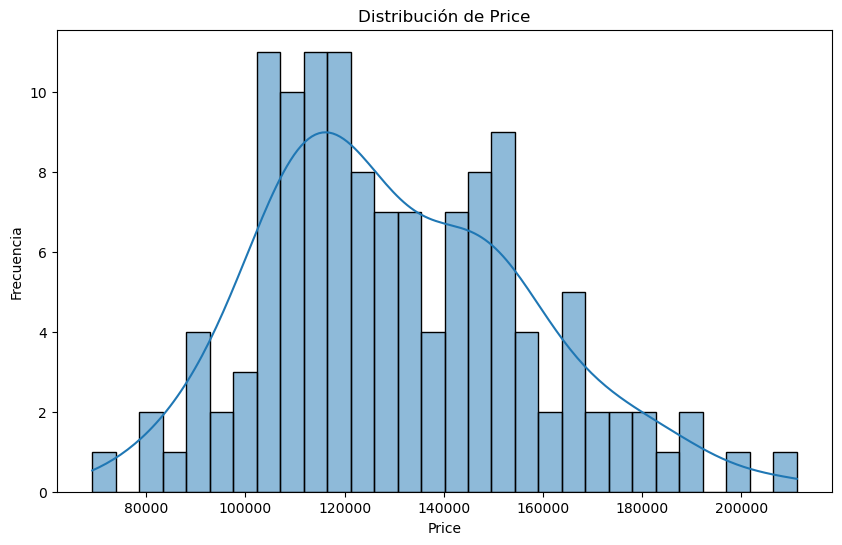

Sesgo (skewness) de Price: 0.47


In [ ]:
# Ruta al archivo descargado
ruta_dataset = "../data/house-prices.csv"  # Ajusta esta ruta según corresponda

# Cargar el dataset
df = pd.read_csv(ruta_dataset)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())

# Visualizar la distribución de la variable objetivo (Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

# Calcular el sesgo de la variable objetivo
print(f"Sesgo (skewness) de Price: {skew(df['Price']):.2f}")

In [6]:
# Paso 2: Exploración y detección de sesgo en variables numéricas

# Seleccionar variables numéricas
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular sesgo de todas las variables numéricas
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Mostrar variables con sesgo significativo (skew > 0.75)
print("\nVariables con sesgo significativo (skew > 0.75):")
print(skewed_features[skewed_features > 0.75])



Variables con sesgo significativo (skew > 0.75):
Series([], dtype: float64)


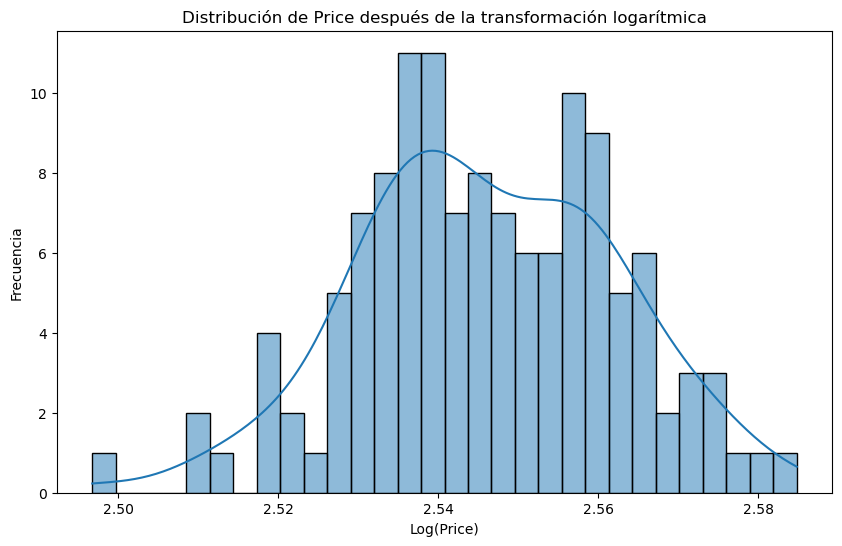


Primeras filas después de las transformaciones:
       Home     Price      SqFt  Bedrooms  Bathrooms    Offers Brick  \
0 -1.718572 -0.535577 -1.000916 -1.415327  -0.868939 -0.542769    No   
1 -1.691507 -0.539879  0.137904  1.350503  -0.868939  0.396075    No   
2 -1.664443 -0.514125 -1.238171 -0.032412  -0.868939 -1.481614    No   
3 -1.637379 -1.467162 -0.099350 -0.032412  -0.868939  0.396075    No   
4 -1.610315 -0.304998  0.612413 -0.032412   1.082362  0.396075    No   

  Neighborhood   SqFt^2  Bedrooms^2  
0         East  3204100           4  
1         East  4120900          16  
2         East  3027600           9  
3         East  3920400           9  
4         East  4536900           9  


In [9]:
# Paso 3.1: Transformación logarítmica de variables sesgadas

# Aplicar logaritmo a variables con sesgo significativo (skew > 0.75)
for feature in skewed_features[skewed_features > 0.75].index:
    if all(df[feature] > 0):  # Solo aplicar logaritmo si no hay valores negativos
        df[feature] = np.log1p(df[feature])

# Transformar Price
df['Price'] = np.log1p(df['Price'])

# Verificar la nueva distribución de Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribución de Price después de la transformación logarítmica')
plt.xlabel('Log(Price)')
plt.ylabel('Frecuencia')
plt.show()

# Paso 3.2: Creación de variables polinómicas
df['SqFt^2'] = df['SqFt'] ** 2
df['Bedrooms^2'] = df['Bedrooms'] ** 2

# Paso 3.3: Estandarización de las variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Estandarizar todas las variables numéricas
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

print("\nPrimeras filas después de las transformaciones:")
print(df_scaled.head())


In [8]:
print("Columnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')


In [11]:
print("Tipos de datos en el dataset:")
print(df.dtypes)


Tipos de datos en el dataset:
Home              int64
Price           float64
SqFt              int64
Bedrooms          int64
Bathrooms         int64
Offers            int64
Brick            object
Neighborhood     object
SqFt^2            int64
Bedrooms^2        int64
dtype: object


In [12]:
# Codificar las columnas categóricas usando pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['Brick', 'Neighborhood'], drop_first=True)

# Verificar las nuevas columnas después de codificar
print("Columnas después de la codificación:")
print(df_encoded.columns)

# Continuar con el modelo utilizando el dataset codificado
# Variables predictoras y objetivo
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas del modelo:")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Columnas después de la codificación:
Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'SqFt^2',
       'Bedrooms^2', 'Brick_Yes', 'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

Métricas del modelo:
RMSE: 0.0067
R-squared: 0.7971



Coeficientes del modelo:
Neighborhood_West     1.133897e-02
Brick_Yes             9.295568e-03
Bedrooms              7.851570e-03
Bathrooms             3.935803e-03
SqFt                  3.999707e-05
SqFt^2               -5.730136e-10
Home                 -4.445407e-06
Neighborhood_North   -3.343458e-04
Bedrooms^2           -9.502937e-04
Offers               -5.676682e-03
dtype: float64


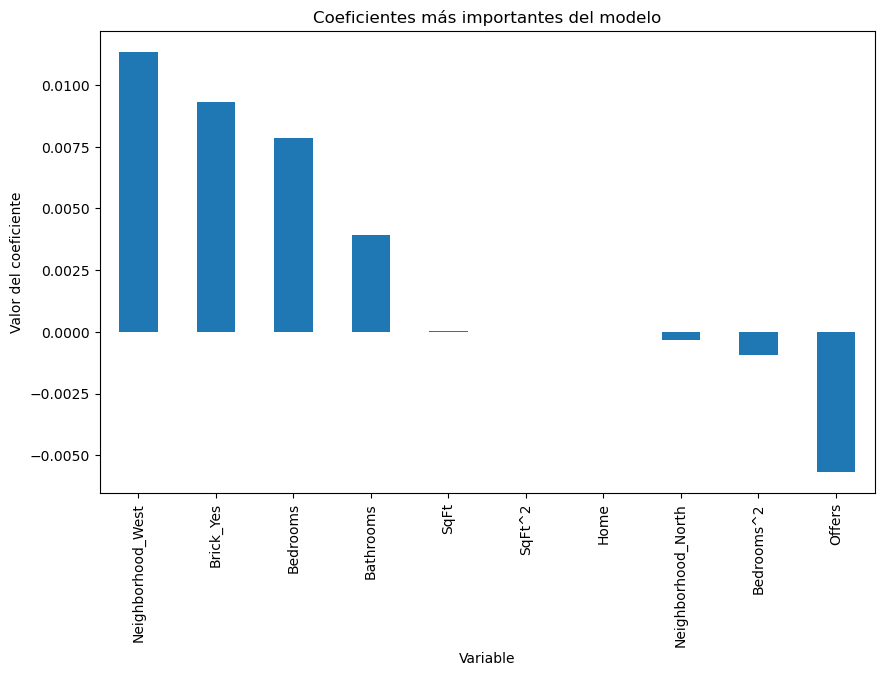

In [13]:
# Paso 5: Analizar coeficientes del modelo para interpretar las transformaciones
coef = pd.Series(model.coef_, index=X.columns)
print("\nCoeficientes del modelo:")
print(coef.sort_values(ascending=False))

# Visualizar los coeficientes más importantes
plt.figure(figsize=(10, 6))
coef.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Coeficientes más importantes del modelo')
plt.ylabel('Valor del coeficiente')
plt.xlabel('Variable')
plt.show()
